## Maximum likelihood mapmaking

2025-11-23 16:14:44.138 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 100MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -2.311e-04
    max: -5.838e-08
    rms: 2.941e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


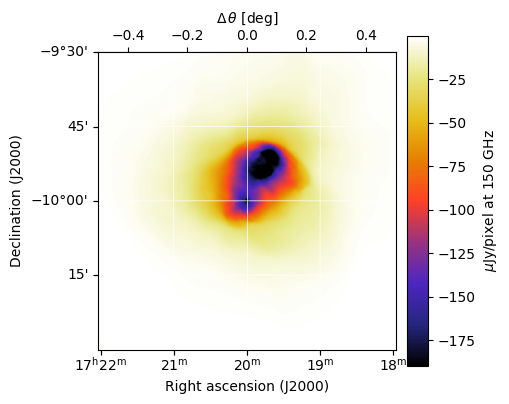

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 2e1 

input_map.plot()
print(input_map)

PlanList(2 plans, 1200 s):
                           start_time duration target(ra,dec)     center(az,el)
chunk                                                                          
0      2025-11-23 16:37:15.861 +00:00    600 s   (260°, -10°)  (49.73°, 70.92°)
1      2025-11-23 16:47:53.361 +00:00    600 s   (260°, -10°)  (43.58°, 72.71°)


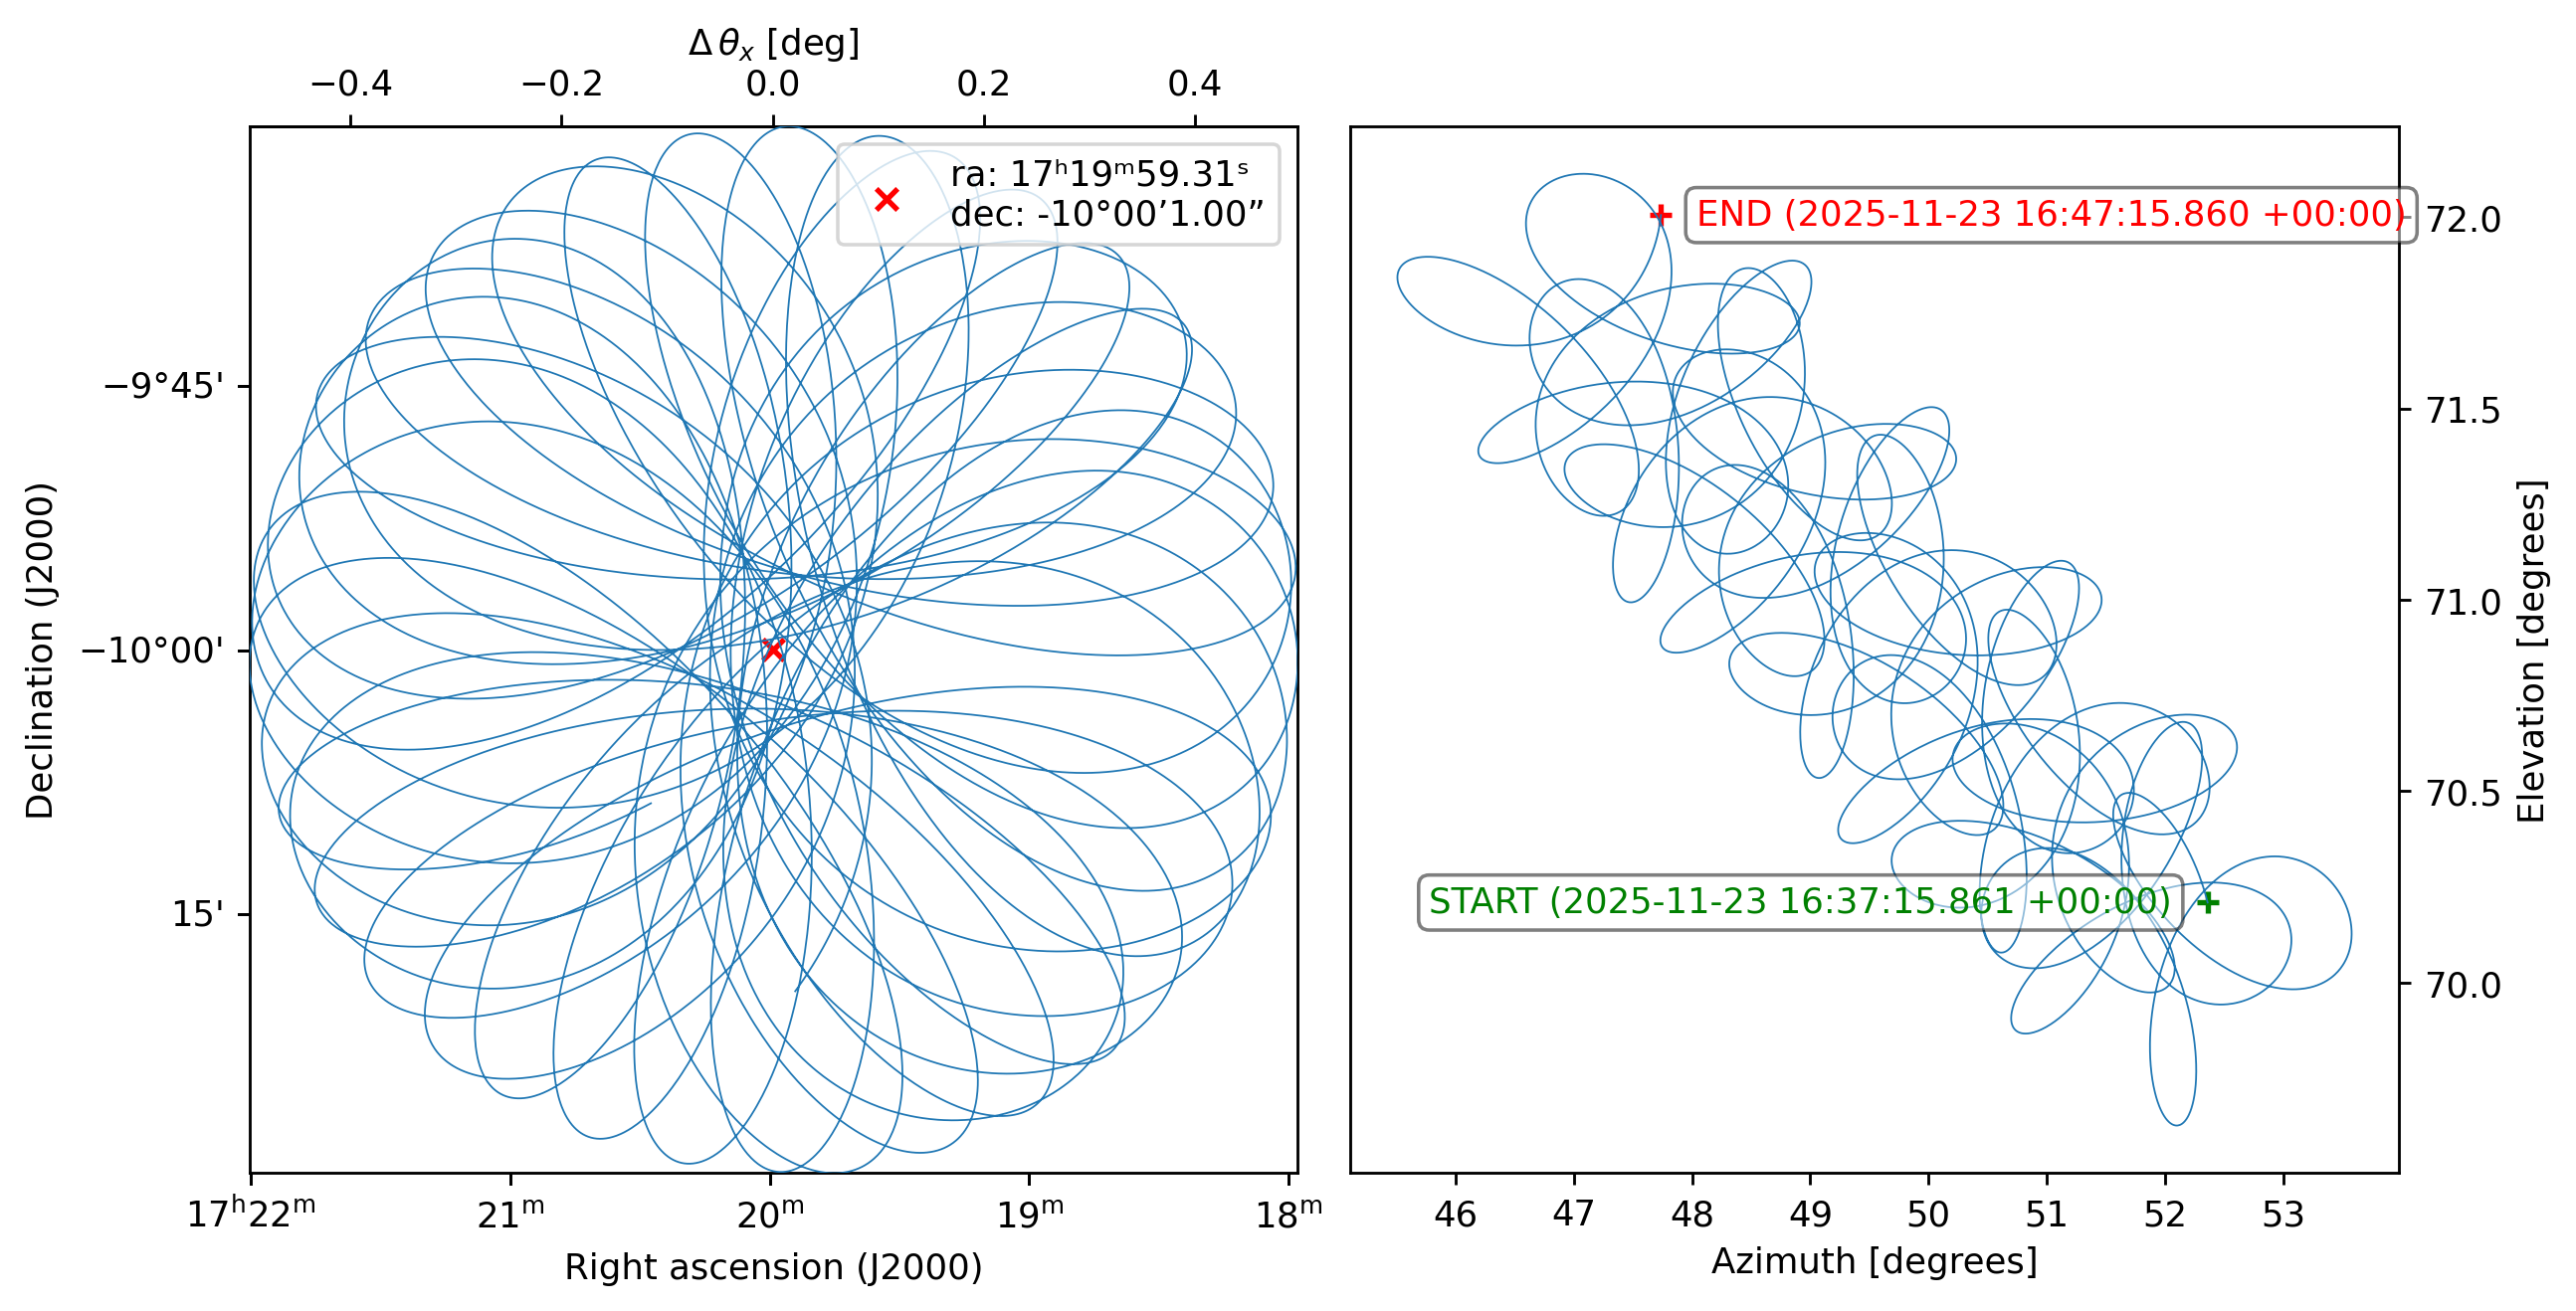

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=1200, 
                               max_chunk_duration=600, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  678  5.953’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


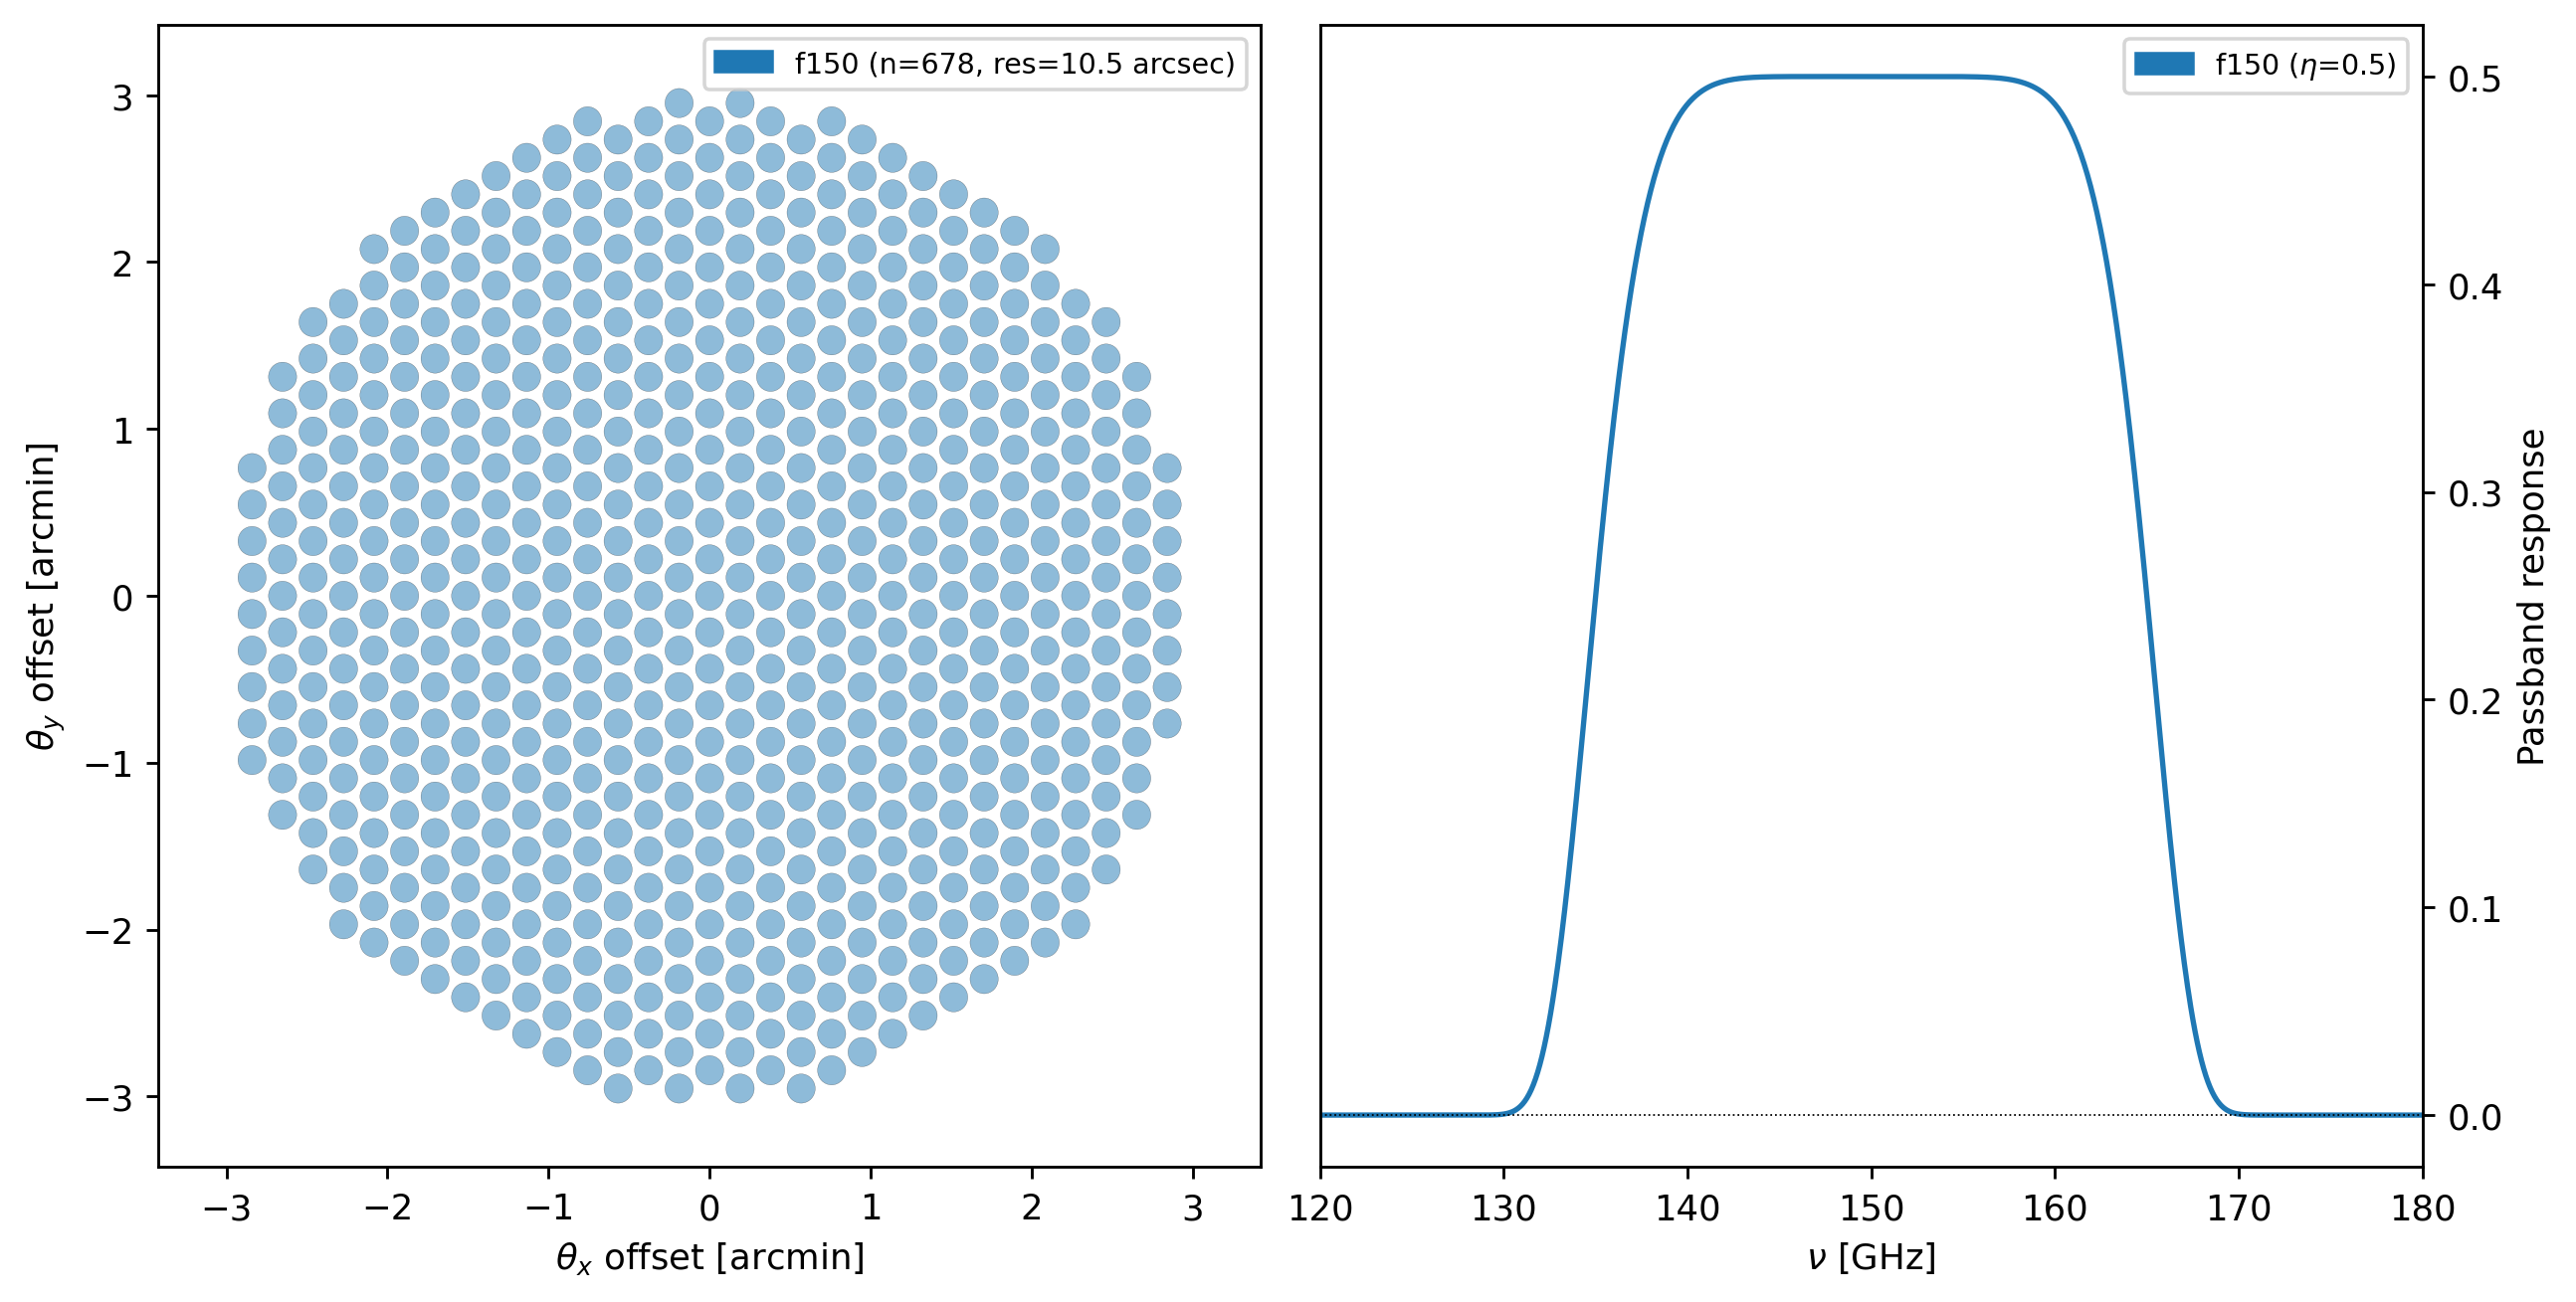

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e0, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.25,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  678  5.953’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 1200 s):
│                            start_time duration target(ra,dec)     center(az,el)
│ chunk                                                                          
│ 0      2025-11-23 16:37:15.861 +00:00    600 s   (260°, -10°)  (49.73°, 70.92°)
│ 1      2025-11-23 16:47:53.361 +00:00    600 s   (260°, -10°)  (43.58°, 72.71°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
   

2025-11-23 16:14:55.207 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:05,  1.34it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:03,  1.58it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:02,  1.67it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.65it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:01,  1.67it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.68it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:04<00:00,  1.71it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.71it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.67it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 32.60it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 20.36it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 21.52it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:09,  1.31s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.24it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.57it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.78it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.93it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.04it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  2.10it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.16it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.81it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.18it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.18it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.19s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.19s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.12it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.12it/s, band=f150]

2025-11-23 16:15:29.031 INFO: Simulated observation 1 of 2 in 33.81 s


2025-11-23 16:15:29.031 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.59it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:04,  1.46it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:03,  1.52it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.59it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:01,  1.67it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.68it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:04<00:00,  1.73it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.74it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.66it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 38.03it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 21.94it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 23.38it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:07,  1.13s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.43it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:01<00:02,  1.79it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:01,  2.00it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.15it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.23it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  1.93it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.03it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.88it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.54it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.54it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.25s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.25s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.82it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.82it/s, band=f150]

2025-11-23 16:16:00.862 INFO: Simulated observation 2 of 2 in 31.82 s


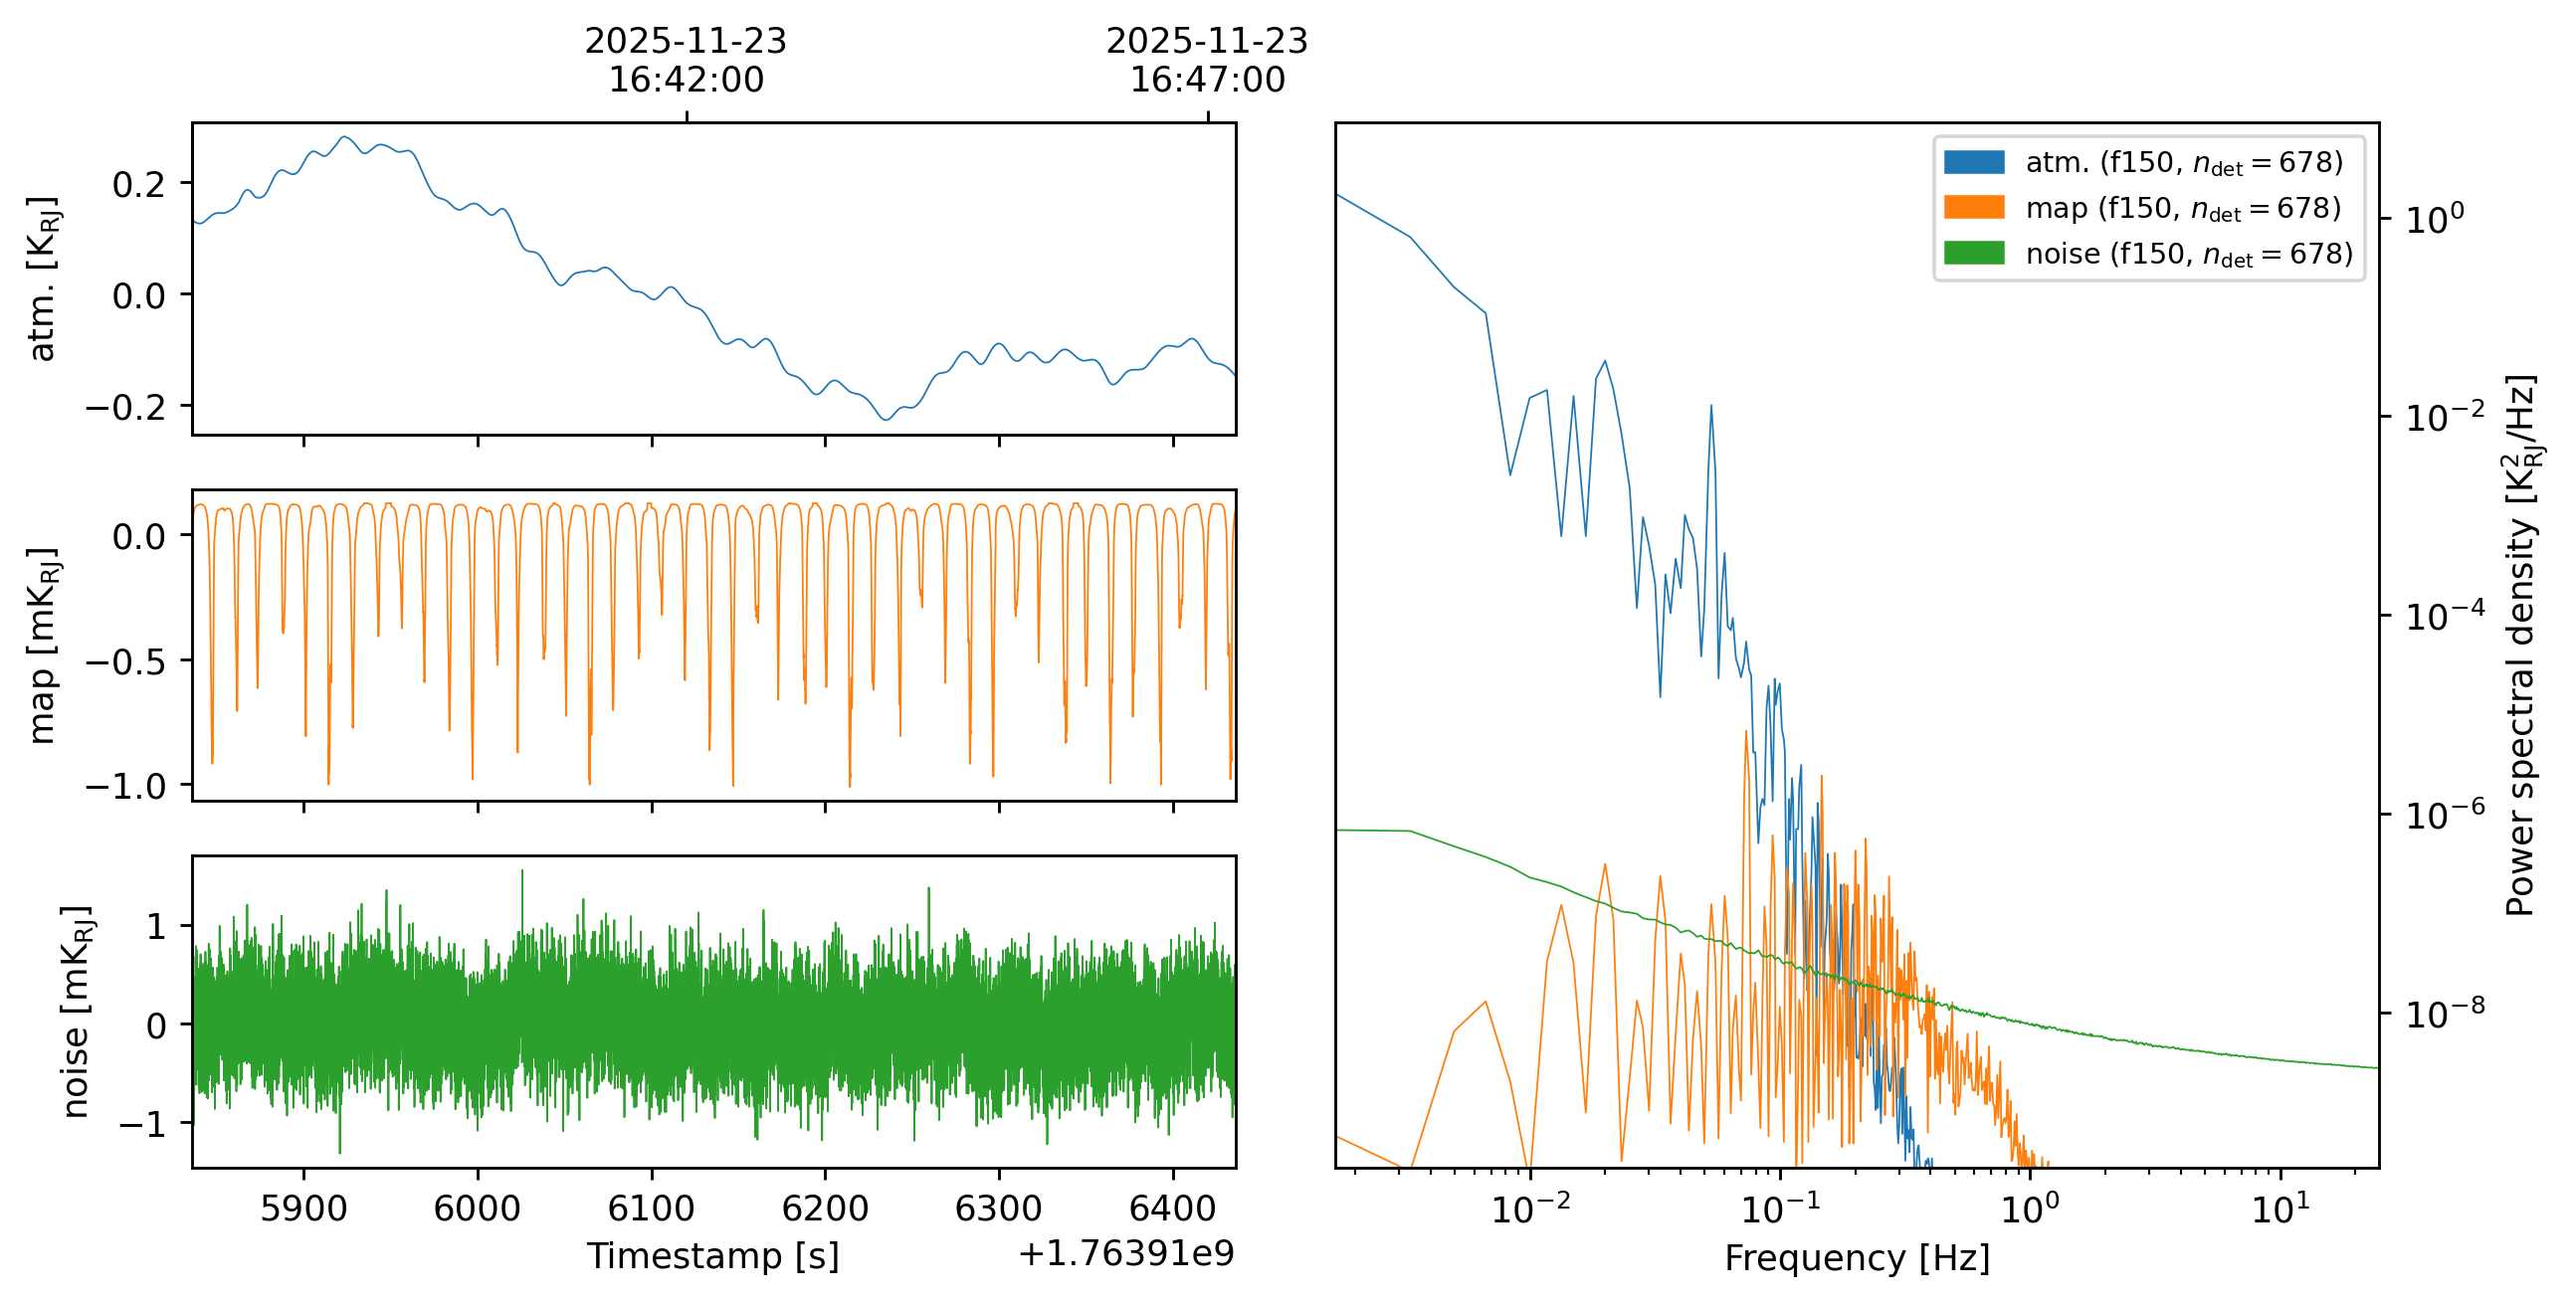

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(frame="ra/dec",
                                    width=0.8 * input_map.width.deg,
                                    height=0.8 * input_map.height.deg,
                                    tods=tods, 
                                    units="mK_RJ")


2025-11-23 16:16:10.944 INFO: Inferring center {'ra': '17ʰ20ᵐ0.00ˢ', 'dec': '-9°59’59.72”'} for mapper.


2025-11-23 16:16:10.957 INFO: Inferring mapper resolution 0.48’ for mapper from observation patch.


2025-11-23 16:16:10.959 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/2 [00:00<?, ?it/s]

Preprocessing TODs:  50%|████████        | 1/2 [00:01<00:01,  1.05s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:02<00:00,  1.06s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:02<00:00,  1.06s/it]

Mapping:   0%|          | 0/2 [00:00<?, ?it/s, tod=1/2]

Mapping:  50%|█████     | 1/2 [00:02<00:02,  2.17s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:04<00:00,  2.25s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:04<00:00,  2.24s/it, tod=1/2]

Computing noise model: 0it [00:00, ?it/s]

Computing noise model: 1it [00:03,  3.58s/it]

Computing noise model: 2it [00:07,  3.82s/it]

Computing noise model: 2it [00:07,  3.78s/it]

The initial map is a "guess" constructing by heavily filtering the input TODs:

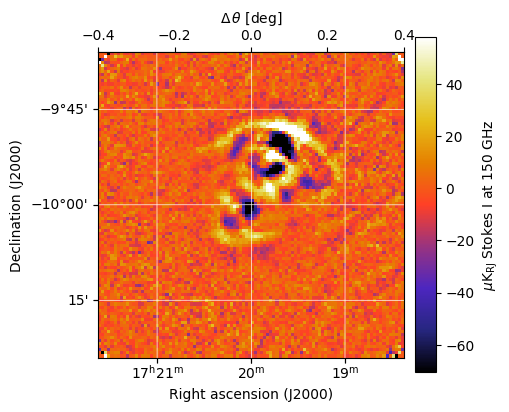

In [7]:
ml_mapper.map.plot()

To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e0)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=7.682e+00]

epoch 1/4:   3%|▌               | 1/32 [00:05<03:00,  5.81s/it, loss=7.682e+00]

epoch 1/4:   3%|▌               | 1/32 [00:11<03:00,  5.81s/it, loss=7.664e+00]

epoch 1/4:   6%|█               | 2/32 [00:11<02:52,  5.77s/it, loss=7.664e+00]

epoch 1/4:   6%|█               | 2/32 [00:17<02:52,  5.77s/it, loss=7.609e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:17<02:46,  5.75s/it, loss=7.609e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:22<02:46,  5.75s/it, loss=7.471e+00]

epoch 1/4:  12%|██              | 4/32 [00:22<02:40,  5.74s/it, loss=7.471e+00]

epoch 1/4:  12%|██              | 4/32 [00:28<02:40,  5.74s/it, loss=7.156e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:28<02:34,  5.74s/it, loss=7.156e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:34<02:34,  5.74s/it, loss=6.573e+00]

epoch 1/4:  19%|███             | 6/32 [00:34<02:29,  5.76s/it, loss=6.573e+00]

epoch 1/4:  19%|███             | 6/32 [00:40<02:29,  5.76s/it, loss=6.139e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:40<02:23,  5.75s/it, loss=6.139e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:46<02:23,  5.75s/it, loss=6.155e+00]

epoch 1/4:  25%|████            | 8/32 [00:46<02:17,  5.75s/it, loss=6.155e+00]

epoch 1/4:  25%|████            | 8/32 [00:51<02:17,  5.75s/it, loss=5.562e+00]

epoch 1/4:  28%|████▌           | 9/32 [00:51<02:12,  5.75s/it, loss=5.562e+00]

epoch 1/4:  28%|████▌           | 9/32 [00:57<02:12,  5.75s/it, loss=5.522e+00]

epoch 1/4:  31%|█████           | 10/32 [00:57<02:06,  5.74s/it, loss=5.522e+00]

epoch 1/4:  31%|█████           | 10/32 [01:03<02:06,  5.74s/it, loss=5.311e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:03<02:01,  5.78s/it, loss=5.311e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:09<02:01,  5.78s/it, loss=4.831e+00]

epoch 1/4:  38%|██████          | 12/32 [01:09<01:55,  5.77s/it, loss=4.831e+00]

epoch 1/4:  38%|██████          | 12/32 [01:14<01:55,  5.77s/it, loss=4.390e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:14<01:49,  5.76s/it, loss=4.390e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:20<01:49,  5.76s/it, loss=4.454e+00]

epoch 1/4:  44%|███████         | 14/32 [01:20<01:43,  5.76s/it, loss=4.454e+00]

epoch 1/4:  44%|███████         | 14/32 [01:26<01:43,  5.76s/it, loss=3.816e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:26<01:37,  5.76s/it, loss=3.816e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:32<01:37,  5.76s/it, loss=3.658e+00]

epoch 1/4:  50%|████████        | 16/32 [01:32<01:32,  5.77s/it, loss=3.658e+00]

epoch 1/4:  50%|████████        | 16/32 [01:37<01:32,  5.77s/it, loss=3.567e+00]

epoch 1/4:  53%|████████▌       | 17/32 [01:37<01:26,  5.76s/it, loss=3.567e+00]

epoch 1/4:  53%|████████▌       | 17/32 [01:43<01:26,  5.76s/it, loss=3.275e+00]

epoch 1/4:  56%|█████████       | 18/32 [01:43<01:20,  5.76s/it, loss=3.275e+00]

epoch 1/4:  56%|█████████       | 18/32 [01:49<01:20,  5.76s/it, loss=3.039e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [01:49<01:14,  5.75s/it, loss=3.039e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [01:55<01:14,  5.75s/it, loss=2.984e+00]

epoch 1/4:  62%|██████████      | 20/32 [01:55<01:09,  5.75s/it, loss=2.984e+00]

epoch 1/4:  62%|██████████      | 20/32 [02:00<01:09,  5.75s/it, loss=2.614e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:00<01:03,  5.76s/it, loss=2.614e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:06<01:03,  5.76s/it, loss=2.488e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:06<00:57,  5.75s/it, loss=2.488e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:12<00:57,  5.75s/it, loss=2.420e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:12<00:51,  5.77s/it, loss=2.420e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:18<00:51,  5.77s/it, loss=2.252e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:18<00:46,  5.77s/it, loss=2.252e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:23<00:46,  5.77s/it, loss=2.170e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [02:23<00:40,  5.75s/it, loss=2.170e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [02:29<00:40,  5.75s/it, loss=2.061e+00]

epoch 1/4:  81%|█████████████   | 26/32 [02:29<00:34,  5.74s/it, loss=2.061e+00]

epoch 1/4:  81%|█████████████   | 26/32 [02:35<00:34,  5.74s/it, loss=1.881e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:35<00:28,  5.74s/it, loss=1.881e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:41<00:28,  5.74s/it, loss=1.827e+00]

epoch 1/4:  88%|██████████████  | 28/32 [02:41<00:22,  5.74s/it, loss=1.827e+00]

epoch 1/4:  88%|██████████████  | 28/32 [02:46<00:22,  5.74s/it, loss=1.741e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:46<00:17,  5.73s/it, loss=1.741e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:52<00:17,  5.73s/it, loss=1.658e+00]

epoch 1/4:  94%|███████████████ | 30/32 [02:52<00:11,  5.74s/it, loss=1.658e+00]

epoch 1/4:  94%|███████████████ | 30/32 [02:58<00:11,  5.74s/it, loss=1.615e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [02:58<00:05,  5.73s/it, loss=1.615e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [03:04<00:05,  5.73s/it, loss=1.498e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:04<00:00,  5.73s/it, loss=1.498e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:04<00:00,  5.75s/it, loss=1.498e+00]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=1.447e+00]

epoch 2/4:   3%|▌               | 1/32 [00:05<02:57,  5.74s/it, loss=1.447e+00]

epoch 2/4:   3%|▌               | 1/32 [00:11<02:57,  5.74s/it, loss=1.399e+00]

epoch 2/4:   6%|█               | 2/32 [00:11<02:52,  5.76s/it, loss=1.399e+00]

epoch 2/4:   6%|█               | 2/32 [00:17<02:52,  5.76s/it, loss=1.342e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:17<02:46,  5.75s/it, loss=1.342e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:22<02:46,  5.75s/it, loss=1.317e+00]

epoch 2/4:  12%|██              | 4/32 [00:22<02:40,  5.75s/it, loss=1.317e+00]

epoch 2/4:  12%|██              | 4/32 [00:28<02:40,  5.75s/it, loss=1.248e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:28<02:35,  5.76s/it, loss=1.248e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:34<02:35,  5.76s/it, loss=1.211e+00]

epoch 2/4:  19%|███             | 6/32 [00:34<02:29,  5.77s/it, loss=1.211e+00]

epoch 2/4:  19%|███             | 6/32 [00:40<02:29,  5.77s/it, loss=1.173e+00]

epoch 2/4:  22%|███▌            | 7/32 [00:40<02:24,  5.77s/it, loss=1.173e+00]

epoch 2/4:  22%|███▌            | 7/32 [00:46<02:24,  5.77s/it, loss=1.134e+00]

epoch 2/4:  25%|████            | 8/32 [00:46<02:18,  5.77s/it, loss=1.134e+00]

epoch 2/4:  25%|████            | 8/32 [00:51<02:18,  5.77s/it, loss=1.114e+00]

epoch 2/4:  28%|████▌           | 9/32 [00:51<02:12,  5.76s/it, loss=1.114e+00]

epoch 2/4:  28%|████▌           | 9/32 [00:57<02:12,  5.76s/it, loss=1.069e+00]

epoch 2/4:  31%|█████           | 10/32 [00:57<02:06,  5.77s/it, loss=1.069e+00]

epoch 2/4:  31%|█████           | 10/32 [01:03<02:06,  5.77s/it, loss=1.048e+00]

epoch 2/4:  34%|█████▌          | 11/32 [01:03<02:01,  5.79s/it, loss=1.048e+00]

epoch 2/4:  34%|█████▌          | 11/32 [01:09<02:01,  5.79s/it, loss=1.016e+00]

epoch 2/4:  38%|██████          | 12/32 [01:09<01:56,  5.80s/it, loss=1.016e+00]

epoch 2/4:  38%|██████          | 12/32 [01:15<01:56,  5.80s/it, loss=9.924e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:15<01:50,  5.80s/it, loss=9.924e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:20<01:50,  5.80s/it, loss=9.690e-01]

epoch 2/4:  44%|███████         | 14/32 [01:20<01:44,  5.78s/it, loss=9.690e-01]

epoch 2/4:  44%|███████         | 14/32 [01:26<01:44,  5.78s/it, loss=9.400e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:26<01:38,  5.78s/it, loss=9.400e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:32<01:38,  5.78s/it, loss=9.228e-01]

epoch 2/4:  50%|████████        | 16/32 [01:32<01:32,  5.76s/it, loss=9.228e-01]

epoch 2/4:  50%|████████        | 16/32 [01:38<01:32,  5.76s/it, loss=8.970e-01]

epoch 2/4:  53%|████████▌       | 17/32 [01:38<01:26,  5.76s/it, loss=8.970e-01]

epoch 2/4:  53%|████████▌       | 17/32 [01:43<01:26,  5.76s/it, loss=8.819e-01]

epoch 2/4:  56%|█████████       | 18/32 [01:43<01:20,  5.75s/it, loss=8.819e-01]

epoch 2/4:  56%|█████████       | 18/32 [01:49<01:20,  5.75s/it, loss=8.579e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [01:49<01:14,  5.74s/it, loss=8.579e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [01:55<01:14,  5.74s/it, loss=8.424e-01]

epoch 2/4:  62%|██████████      | 20/32 [01:55<01:08,  5.75s/it, loss=8.424e-01]

epoch 2/4:  62%|██████████      | 20/32 [02:01<01:08,  5.75s/it, loss=8.249e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:01<01:03,  5.76s/it, loss=8.249e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:06<01:03,  5.76s/it, loss=8.105e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:06<00:57,  5.76s/it, loss=8.105e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:12<00:57,  5.76s/it, loss=7.962e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:12<00:51,  5.75s/it, loss=7.962e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:18<00:51,  5.75s/it, loss=7.812e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:18<00:45,  5.74s/it, loss=7.812e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:24<00:45,  5.74s/it, loss=7.694e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [02:24<00:40,  5.75s/it, loss=7.694e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [02:29<00:40,  5.75s/it, loss=7.552e-01]

epoch 2/4:  81%|█████████████   | 26/32 [02:29<00:34,  5.77s/it, loss=7.552e-01]

epoch 2/4:  81%|█████████████   | 26/32 [02:35<00:34,  5.77s/it, loss=7.444e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:35<00:28,  5.77s/it, loss=7.444e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:41<00:28,  5.77s/it, loss=7.302e-01]

epoch 2/4:  88%|██████████████  | 28/32 [02:41<00:23,  5.78s/it, loss=7.302e-01]

epoch 2/4:  88%|██████████████  | 28/32 [02:47<00:23,  5.78s/it, loss=7.203e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:47<00:17,  5.78s/it, loss=7.203e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:53<00:17,  5.78s/it, loss=7.086e-01]

epoch 2/4:  94%|███████████████ | 30/32 [02:53<00:11,  5.78s/it, loss=7.086e-01]

epoch 2/4:  94%|███████████████ | 30/32 [02:58<00:11,  5.78s/it, loss=7.004e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [02:58<00:05,  5.78s/it, loss=7.004e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [03:04<00:05,  5.78s/it, loss=6.899e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:04<00:00,  5.76s/it, loss=6.899e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:04<00:00,  5.77s/it, loss=6.899e-01]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=6.824e-01]

epoch 3/4:   3%|▌               | 1/32 [00:05<02:57,  5.71s/it, loss=6.824e-01]

epoch 3/4:   3%|▌               | 1/32 [00:11<02:57,  5.71s/it, loss=6.733e-01]

epoch 3/4:   6%|█               | 2/32 [00:11<02:51,  5.72s/it, loss=6.733e-01]

epoch 3/4:   6%|█               | 2/32 [00:17<02:51,  5.72s/it, loss=6.666e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:17<02:45,  5.72s/it, loss=6.666e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:22<02:45,  5.72s/it, loss=6.582e-01]

epoch 3/4:  12%|██              | 4/32 [00:22<02:40,  5.73s/it, loss=6.582e-01]

epoch 3/4:  12%|██              | 4/32 [00:28<02:40,  5.73s/it, loss=6.521e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:28<02:34,  5.73s/it, loss=6.521e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:34<02:34,  5.73s/it, loss=6.450e-01]

epoch 3/4:  19%|███             | 6/32 [00:34<02:29,  5.74s/it, loss=6.450e-01]

epoch 3/4:  19%|███             | 6/32 [00:40<02:29,  5.74s/it, loss=6.396e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:40<02:23,  5.72s/it, loss=6.396e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:45<02:23,  5.72s/it, loss=6.334e-01]

epoch 3/4:  25%|████            | 8/32 [00:45<02:17,  5.73s/it, loss=6.334e-01]

epoch 3/4:  25%|████            | 8/32 [00:51<02:17,  5.73s/it, loss=6.286e-01]

epoch 3/4:  28%|████▌           | 9/32 [00:51<02:11,  5.73s/it, loss=6.286e-01]

epoch 3/4:  28%|████▌           | 9/32 [00:57<02:11,  5.73s/it, loss=6.231e-01]

epoch 3/4:  31%|█████           | 10/32 [00:57<02:05,  5.72s/it, loss=6.231e-01]

epoch 3/4:  31%|█████           | 10/32 [01:02<02:05,  5.72s/it, loss=6.187e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:02<02:00,  5.72s/it, loss=6.187e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:08<02:00,  5.72s/it, loss=6.136e-01]

epoch 3/4:  38%|██████          | 12/32 [01:08<01:54,  5.71s/it, loss=6.136e-01]

epoch 3/4:  38%|██████          | 12/32 [01:14<01:54,  5.71s/it, loss=6.094e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:14<01:48,  5.72s/it, loss=6.094e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:20<01:48,  5.72s/it, loss=6.050e-01]

epoch 3/4:  44%|███████         | 14/32 [01:20<01:42,  5.72s/it, loss=6.050e-01]

epoch 3/4:  44%|███████         | 14/32 [01:25<01:42,  5.72s/it, loss=6.012e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:25<01:37,  5.73s/it, loss=6.012e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:31<01:37,  5.73s/it, loss=5.973e-01]

epoch 3/4:  50%|████████        | 16/32 [01:31<01:31,  5.73s/it, loss=5.973e-01]

epoch 3/4:  50%|████████        | 16/32 [01:37<01:31,  5.73s/it, loss=5.939e-01]

epoch 3/4:  53%|████████▌       | 17/32 [01:37<01:26,  5.73s/it, loss=5.939e-01]

epoch 3/4:  53%|████████▌       | 17/32 [01:43<01:26,  5.73s/it, loss=5.905e-01]

epoch 3/4:  56%|█████████       | 18/32 [01:43<01:20,  5.74s/it, loss=5.905e-01]

epoch 3/4:  56%|█████████       | 18/32 [01:48<01:20,  5.74s/it, loss=5.872e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [01:48<01:14,  5.75s/it, loss=5.872e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [01:54<01:14,  5.75s/it, loss=5.840e-01]

epoch 3/4:  62%|██████████      | 20/32 [01:54<01:09,  5.76s/it, loss=5.840e-01]

epoch 3/4:  62%|██████████      | 20/32 [02:00<01:09,  5.76s/it, loss=5.809e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:00<01:03,  5.76s/it, loss=5.809e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:06<01:03,  5.76s/it, loss=5.780e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:06<00:57,  5.75s/it, loss=5.780e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:11<00:57,  5.75s/it, loss=5.750e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:11<00:51,  5.75s/it, loss=5.750e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:17<00:51,  5.75s/it, loss=5.724e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:17<00:45,  5.74s/it, loss=5.724e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:23<00:45,  5.74s/it, loss=5.697e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [02:23<00:40,  5.76s/it, loss=5.697e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [02:29<00:40,  5.76s/it, loss=5.672e-01]

epoch 3/4:  81%|█████████████   | 26/32 [02:29<00:34,  5.75s/it, loss=5.672e-01]

epoch 3/4:  81%|█████████████   | 26/32 [02:34<00:34,  5.75s/it, loss=5.647e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:34<00:28,  5.75s/it, loss=5.647e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:40<00:28,  5.75s/it, loss=5.623e-01]

epoch 3/4:  88%|██████████████  | 28/32 [02:40<00:22,  5.75s/it, loss=5.623e-01]

epoch 3/4:  88%|██████████████  | 28/32 [02:46<00:22,  5.75s/it, loss=5.600e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:46<00:17,  5.74s/it, loss=5.600e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:52<00:17,  5.74s/it, loss=5.577e-01]

epoch 3/4:  94%|███████████████ | 30/32 [02:52<00:11,  5.75s/it, loss=5.577e-01]

epoch 3/4:  94%|███████████████ | 30/32 [02:57<00:11,  5.75s/it, loss=5.556e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [02:57<00:05,  5.74s/it, loss=5.556e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [03:03<00:05,  5.74s/it, loss=5.534e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:03<00:00,  5.73s/it, loss=5.534e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:03<00:00,  5.74s/it, loss=5.534e-01]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=5.514e-01]

epoch 4/4:   3%|▌               | 1/32 [00:05<02:57,  5.71s/it, loss=5.514e-01]

epoch 4/4:   3%|▌               | 1/32 [00:11<02:57,  5.71s/it, loss=5.493e-01]

epoch 4/4:   6%|█               | 2/32 [00:11<02:51,  5.72s/it, loss=5.493e-01]

epoch 4/4:   6%|█               | 2/32 [00:17<02:51,  5.72s/it, loss=5.474e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:17<02:46,  5.73s/it, loss=5.474e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:22<02:46,  5.73s/it, loss=5.455e-01]

epoch 4/4:  12%|██              | 4/32 [00:22<02:40,  5.74s/it, loss=5.455e-01]

epoch 4/4:  12%|██              | 4/32 [00:28<02:40,  5.74s/it, loss=5.436e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:28<02:34,  5.73s/it, loss=5.436e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:34<02:34,  5.73s/it, loss=5.419e-01]

epoch 4/4:  19%|███             | 6/32 [00:34<02:28,  5.73s/it, loss=5.419e-01]

epoch 4/4:  19%|███             | 6/32 [00:40<02:28,  5.73s/it, loss=5.401e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:40<02:23,  5.72s/it, loss=5.401e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:45<02:23,  5.72s/it, loss=5.384e-01]

epoch 4/4:  25%|████            | 8/32 [00:45<02:17,  5.72s/it, loss=5.384e-01]

epoch 4/4:  25%|████            | 8/32 [00:51<02:17,  5.72s/it, loss=5.367e-01]

epoch 4/4:  28%|████▌           | 9/32 [00:51<02:11,  5.72s/it, loss=5.367e-01]

epoch 4/4:  28%|████▌           | 9/32 [00:57<02:11,  5.72s/it, loss=5.351e-01]

epoch 4/4:  31%|█████           | 10/32 [00:57<02:05,  5.72s/it, loss=5.351e-01]

epoch 4/4:  31%|█████           | 10/32 [01:02<02:05,  5.72s/it, loss=5.335e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:02<01:59,  5.71s/it, loss=5.335e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:08<01:59,  5.71s/it, loss=5.320e-01]

epoch 4/4:  38%|██████          | 12/32 [01:08<01:54,  5.71s/it, loss=5.320e-01]

epoch 4/4:  38%|██████          | 12/32 [01:14<01:54,  5.71s/it, loss=5.305e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:14<01:48,  5.71s/it, loss=5.305e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:20<01:48,  5.71s/it, loss=5.290e-01]

epoch 4/4:  44%|███████         | 14/32 [01:20<01:43,  5.73s/it, loss=5.290e-01]

epoch 4/4:  44%|███████         | 14/32 [01:25<01:43,  5.73s/it, loss=5.276e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:25<01:37,  5.73s/it, loss=5.276e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:31<01:37,  5.73s/it, loss=5.262e-01]

epoch 4/4:  50%|████████        | 16/32 [01:31<01:31,  5.73s/it, loss=5.262e-01]

epoch 4/4:  50%|████████        | 16/32 [01:37<01:31,  5.73s/it, loss=5.249e-01]

epoch 4/4:  53%|████████▌       | 17/32 [01:37<01:26,  5.74s/it, loss=5.249e-01]

epoch 4/4:  53%|████████▌       | 17/32 [01:43<01:26,  5.74s/it, loss=5.236e-01]

epoch 4/4:  56%|█████████       | 18/32 [01:43<01:20,  5.74s/it, loss=5.236e-01]

epoch 4/4:  56%|█████████       | 18/32 [01:48<01:20,  5.74s/it, loss=5.223e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [01:48<01:14,  5.74s/it, loss=5.223e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [01:54<01:14,  5.74s/it, loss=5.210e-01]

epoch 4/4:  62%|██████████      | 20/32 [01:54<01:08,  5.74s/it, loss=5.210e-01]

epoch 4/4:  62%|██████████      | 20/32 [02:00<01:08,  5.74s/it, loss=5.198e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:00<01:03,  5.74s/it, loss=5.198e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:06<01:03,  5.74s/it, loss=5.186e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:06<00:57,  5.74s/it, loss=5.186e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:11<00:57,  5.74s/it, loss=5.174e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:11<00:51,  5.74s/it, loss=5.174e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:17<00:51,  5.74s/it, loss=5.163e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:17<00:45,  5.75s/it, loss=5.163e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:23<00:45,  5.75s/it, loss=5.151e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:23<00:40,  5.76s/it, loss=5.151e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:29<00:40,  5.76s/it, loss=5.140e-01]

epoch 4/4:  81%|█████████████   | 26/32 [02:29<00:34,  5.75s/it, loss=5.140e-01]

epoch 4/4:  81%|█████████████   | 26/32 [02:34<00:34,  5.75s/it, loss=5.130e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:34<00:28,  5.75s/it, loss=5.130e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:40<00:28,  5.75s/it, loss=5.119e-01]

epoch 4/4:  88%|██████████████  | 28/32 [02:40<00:22,  5.75s/it, loss=5.119e-01]

epoch 4/4:  88%|██████████████  | 28/32 [02:46<00:22,  5.75s/it, loss=5.109e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:46<00:17,  5.75s/it, loss=5.109e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:52<00:17,  5.75s/it, loss=5.099e-01]

epoch 4/4:  94%|███████████████ | 30/32 [02:52<00:11,  5.74s/it, loss=5.099e-01]

epoch 4/4:  94%|███████████████ | 30/32 [02:57<00:11,  5.74s/it, loss=5.088e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [02:57<00:05,  5.74s/it, loss=5.088e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [03:03<00:05,  5.74s/it, loss=5.079e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:03<00:00,  5.74s/it, loss=5.079e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:03<00:00,  5.73s/it, loss=5.079e-01]

which gives us an improved map

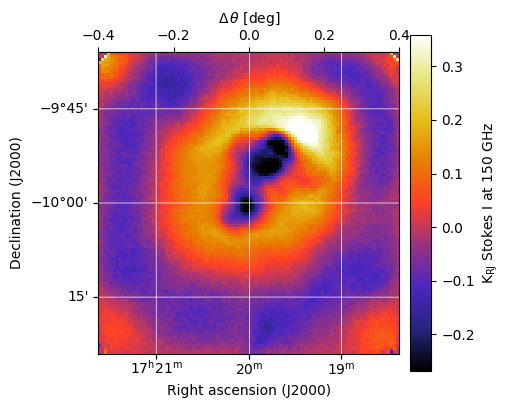

In [9]:
ml_mapper.map.plot()

that will improve more as it continues to fit.